## Bibliotecas

In [1]:
import os # Esta biblioteca foi importada para corrigir um warning ao usar a função KMeans()
os.environ["OMP_NUM_THREADS"] = '1'

import yfinance as yf
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from scipy.stats import zscore
import matplotlib.pyplot as plt
import sklearn as sk 
import pingouin as pg
import plotly.graph_objects as go
import numpy as np
from adjustText import adjust_text # para ajustar os textos nos plots
pd.set_option('display.max_columns', None) # Para vizualizar todas as colunas do Dataframe

# Base de Dados

## Dicionário da Base de Dados

A seleção dos tickers foi baseado na listagem de setores do Yahoo Finance e também das classes e subclasses de ETFs disponíveis pela BlackRock.

In [2]:
tickers_nomes = {
    # Índices de Mercado
    '^FTW5000': 'Wilshire 5000',
    '^GSPC': 'S&P 500',
    '^DJI': 'Dow Jones Industrial Average',
    '^IXIC': 'NASDAQ Composite',
    '^RUT': 'Russell 2000',
    
    # Índices Setores
    '^NDX' : 'U.S. Tecnology',
    '^SP500-40': 'U.S. Financials',
    '^SP500-35': 'U.S. Healthcare',
    '^SP500-25': 'U.S. Consumer Services',
    '^SP500-50': 'U.S. Telecommunications',
    '^SP500-20': 'U.S. Industrials',
    '^SP500-30': 'U.S. Consumer Goods',
    '^SP500-15': 'U.S. Basic Materials',
    '^SP500-60': 'U.S. Real Estate',
    '^SP500-55': 'U.S. Utilities',
    '^SP500-1010': 'U.S. Energy',

    # Corporate Bonds
    'AGG': 'Core U.S. Aggregate Bond',
    'LQD': 'Investment Grade Corporate Bond',
    'HYG': 'High Yield Corporate Bond',
    
    # Treasures
    'DX-Y.NYB': 'U.S. Dólar Index',
    'SHV': 'Short Term Treasury Bond',
    'SHY': '1-3 Year Treasury Bond',
    'IEF': '7-10 Year Treasury Bond',
    'TIP': 'TIPS Bond',
    
    # Commodities
    'GC=F': 'Gold',
    'BZ=F': 'Brent Oil',
    'SI=F': 'Silver',
    'BZ=F': 'Brent Oil',
    'CL=F': 'Crude Oil',
    'ZC=F': 'Corn',
    'ZS=F': 'Soybean',
    'HG=F': 'Copper',
    'ZW=F': 'Wheat'
}


## Extração de Dados com Yahoo Finance

In [3]:
indices = list(tickers_nomes.keys()) # Extraindo o código do meu dicionário
i_data = pd.DataFrame()

for i in indices:
    i_data[i] = yf.download(i, period = 'max', progress=False)['Adj Close']

In [4]:
i_data = i_data.resample('M').mean()
i_data = i_data.loc['2009-12-31':] # data de início do ticker mais recente
i_data

,^FTW5000,^GSPC,^DJI,^IXIC,^RUT,^NDX,^SP500-40,^SP500-35,^SP500-25,^SP500-50,^SP500-20,^SP500-30,^SP500-15,^SP500-60,^SP500-55,^SP500-1010,AGG,LQD,HYG,DX-Y.NYB,SHV,SHY,IEF,TIP,GC=F,BZ=F,SI=F,CL=F,ZC=F,ZS=F,HG=F,ZW=F
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2009-12-31,11441.162287,1110.377724,10433.442694,2220.599998,611.227728,1816.540910,193.615909,362.710908,233.279546,113.968636,244.869999,276.969091,198.210908,93.012273,158.163636,428.732275,71.213495,62.928131,37.902913,76.790000,95.712982,71.074595,67.246019,72.836120,1128.977284,75.209090,17.609455,74.603183,395.500000,1032.284091,3.187727,532.761364
2010-01-31,11660.525905,1123.581582,10471.235300,2267.774722,631.756309,1850.219470,199.071578,370.201056,235.069473,109.060526,250.225790,275.111579,200.548420,92.027894,155.636841,437.721053,71.193621,63.131192,38.608094,77.840526,95.726693,71.084499,66.870067,73.107203,1116.826300,77.008421,17.713000,78.402632,385.868421,976.947368,3.337658,522.118421
2010-02-28,11327.021536,1089.159989,10214.506271,2194.440006,613.876841,1784.734735,191.552105,362.139475,233.440000,103.415790,245.452103,275.106314,188.717896,89.923684,148.163156,418.243158,71.492962,62.858150,37.697947,80.155789,95.741213,71.294295,67.370022,72.935314,1098.189479,74.909999,15.899895,76.452632,362.776316,938.013158,3.119184,488.789474
2010-03-31,12049.730384,1152.048690,10677.518767,2362.243896,672.932604,1920.616078,209.265652,371.409132,253.686521,106.561305,265.429999,285.249999,201.412608,100.338261,150.973478,429.527825,71.909195,64.047972,39.094088,80.671304,95.735584,71.242304,67.485365,72.666142,1114.356525,79.931304,17.120261,81.290000,363.597826,949.684783,3.395413,479.500000
2010-04-30,12568.394252,1197.316185,11052.147647,2475.720017,715.748099,2010.960013,222.194762,366.930478,271.860477,108.049048,282.000480,287.435715,209.048572,107.223810,153.478095,449.290953,71.883669,64.353915,39.629561,81.232857,95.722787,71.218095,67.275718,73.287995,1151.452375,85.753810,18.152428,84.575237,354.023810,973.333333,3.519190,476.702381
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-02-29,50440.005078,5011.961426,38720.517969,15808.935010,2005.293005,17764.316113,655.894992,1685.735504,1441.337006,271.649004,996.887500,783.810510,532.234508,240.267500,309.677000,644.793506,96.609917,106.520142,75.552005,104.105501,108.467539,80.720121,93.277868,104.918053,2025.214990,81.623999,22.661200,76.610000,423.375000,1169.387500,3.796625,585.812500
2024-03-31,52021.131445,5170.572485,39105.519922,16216.295508,2070.131482,18138.193359,681.930493,1701.381012,1463.920502,277.559999,1040.554993,803.202002,569.624496,244.975500,321.956496,687.851498,96.778362,107.133316,76.289232,103.624001,108.897121,80.877612,93.592433,105.568367,2161.869995,84.665499,24.529550,80.405000,429.500000,1179.287500,3.976425,541.962500
2024-04-30,51400.460405,5112.492742,38401.217330,15950.863548,2014.109553,17776.503285,679.119546,1644.020447,1435.614097,286.516363,1042.101366,795.854545,569.572277,231.215910,331.827723,734.136824,95.315539,105.083093,75.745235,105.411819,109.341000,80.729936,91.695788,104.648767,2332.590898,88.999999,27.495682,84.394091,434.625000,1164.613636,4.360909,564.886364


## Retorno acumulado em janelas móveis

Cálculo do retorno em janelas móveis de 60 meses (5 anos), foi tentado períodos mais longos entretanto perdia-se muitas observações. Por exemplo, se assumisse uma janela de 120 meses (10 anos) perderia 120 observações. 

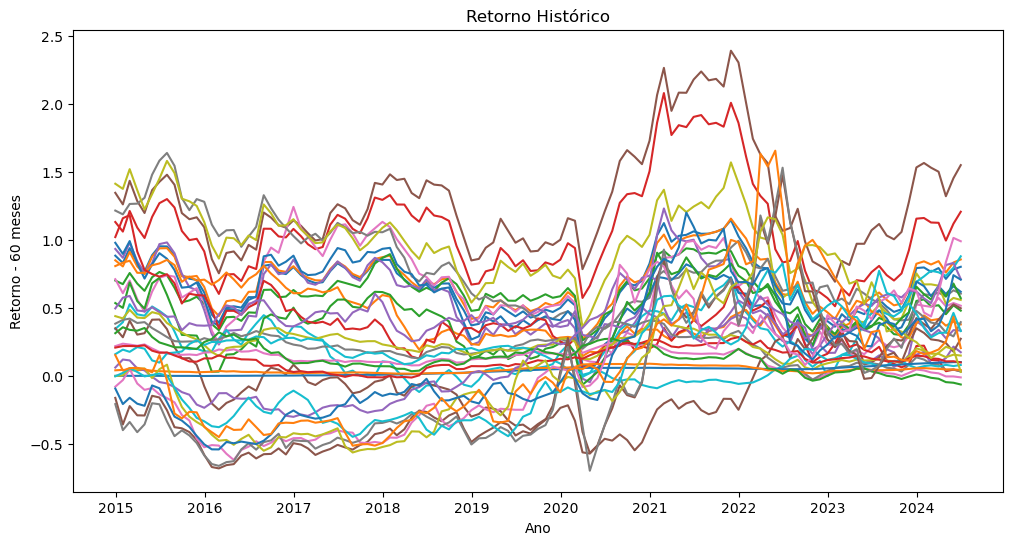

In [24]:
retorno = i_data.pct_change(periods=60).dropna(how='all') # Cálculo do retorno acumulado na janela de 5 anos

plt.figure(figsize=(12,6))

plt.plot(retorno)
plt.title('Retorno Histórico')
plt.xlabel('Ano')
plt.ylabel('Retorno - 60 meses');

Para calcular o retorno médio foi utilizado a média geométrica que captura o efeito composto dos retornos ao longo do tempo. As fórmulas utilizadas encontram-se abaixo:  

#### Retorno Geométrico

$
R_{\text{geom}} = \left( \prod_{i=1}^{n} (1 + R_i) \right)^{\frac{1}{n}} - 1 
$

#### Volatilidade Anualizada

$
\sigma_{\text{anual}} = \sigma_{\text{período}} \times \sqrt{\frac{1}{anos}}
$

In [6]:
ri_data = pd.DataFrame()

ri_data['Retornos'] = ((retorno+1).prod()**(1/(len(retorno)*6))-1)*100 # Cálculo do retorno composto com média geométrica.
ri_data['Volatilidade'] = ((i_data.pct_change(periods=60)).std()/np.sqrt(5))*100 #Anualizando a volatilidade.
ri_data['Índice'] = list(tickers_nomes.values()) 
ri_data = ri_data[['Índice','Retornos','Volatilidade']]

ri_data.sort_values(by='Volatilidade')

,Índice,Retornos,Volatilidade
SHY,1-3 Year Treasury Bond,0.756880,0.993721
SHV,Short Term Treasury Bond,0.622288,1.336298
AGG,Core U.S. Aggregate Bond,2.002518,3.066492
TIP,TIPS Bond,2.002050,3.468794
HYG,High Yield Corporate Bond,3.574077,4.437676
IEF,7-10 Year Treasury Bond,2.066074,4.518792
DX-Y.NYB,U.S. Dólar Index,1.868152,4.614236
LQD,Investment Grade Corporate Bond,3.283246,4.789937
^SP500-55,U.S. Utilities,5.437195,4.807891
^DJI,Dow Jones Industrial Average,7.994793,7.547205


## Plotagem da Base de Dados

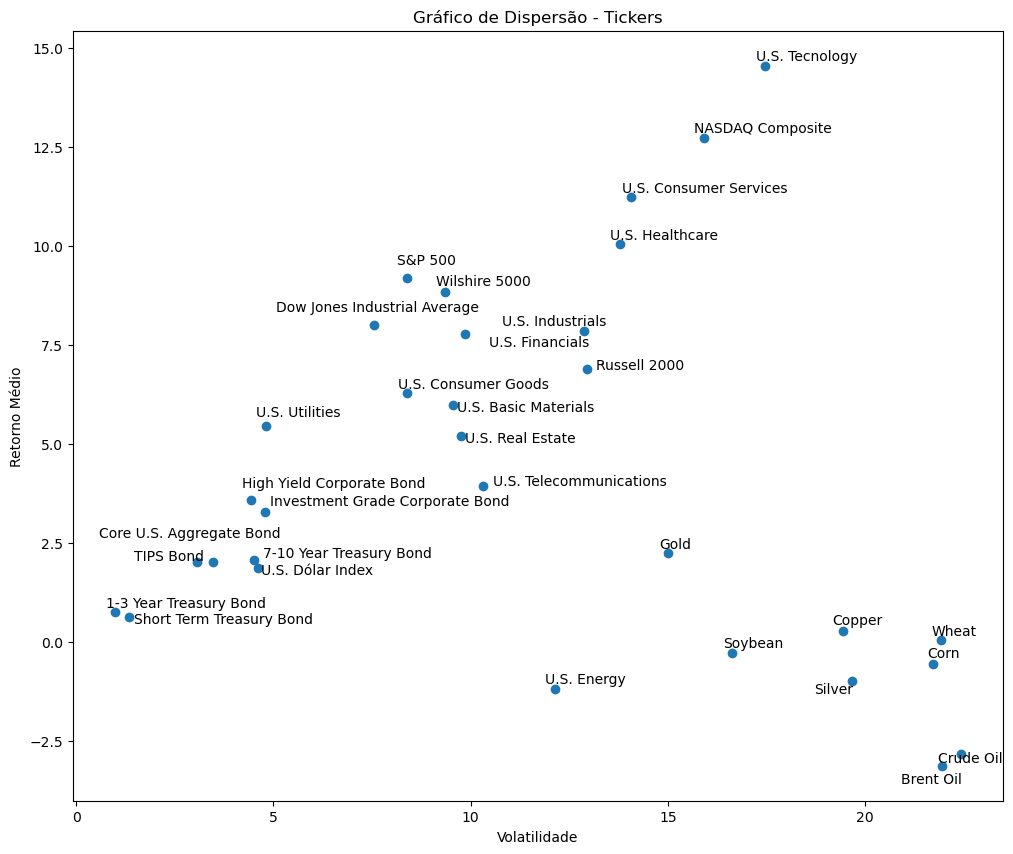

In [7]:
plt.figure(figsize=(12,10))

plt.scatter(ri_data.iloc[:,2], ri_data.iloc[:,1])

texts = [] 
for i, txt in enumerate(ri_data['Índice']):
    texts.append(plt.text(ri_data.iloc[i, 2], ri_data.iloc[i, 1], txt, ha='center'))

plt.xlabel('Volatilidade')
plt.ylabel('Retorno Médio')
plt.title('Gráfico de Dispersão - Tickers')
adjust_text(texts)

## Estatística Descritiva dos Dados

In [8]:
ri_data[['Retornos','Volatilidade']].describe()

,Retornos,Volatilidade
count,32.000000,32.000000
mean,4.172432,11.346075
std,4.585383,6.513207
min,-3.136577,0.993721
25%,0.534861,4.803402
50%,3.428662,10.094824
75%,7.782299,16.083875
max,14.548301,22.418845


## Matriz de Correlação

<Axes: >

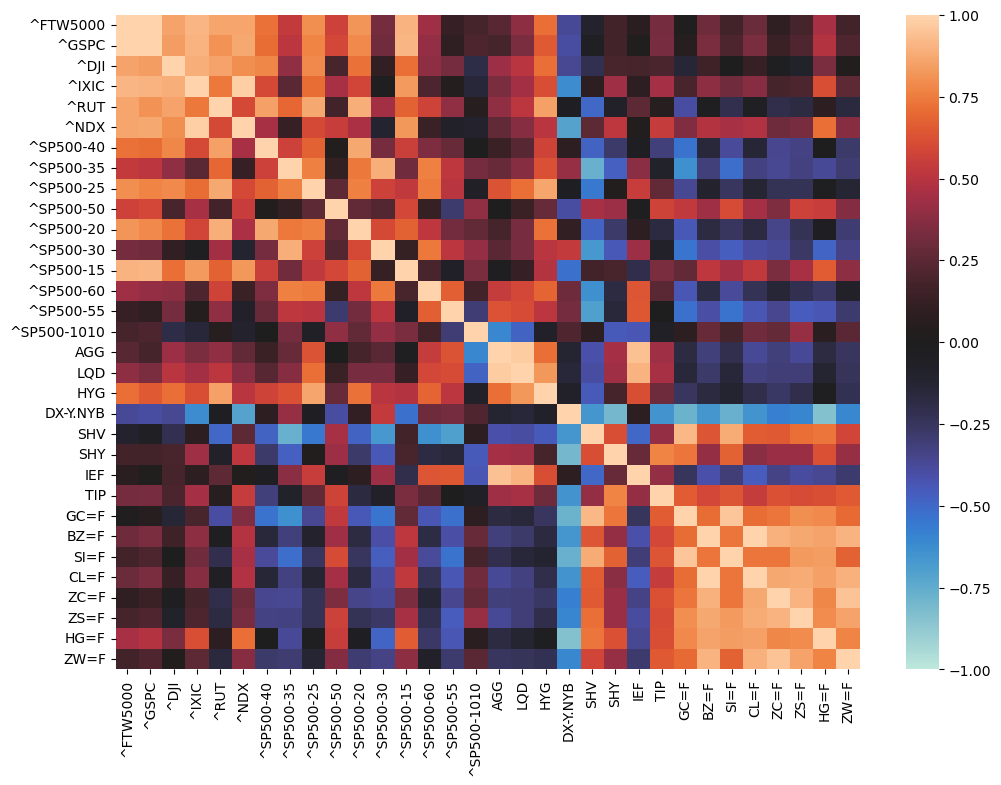

In [9]:
import seaborn as sns

corr = retorno.corr()

plt.figure(figsize=(12, 8.5))
sns.heatmap(corr, center=0, vmin=-1, vmax=1)

In [10]:
# Maiores correlações positivas

corr_stack = corr.stack()
corr_positivo = corr_stack[(corr_stack>0) & (corr_stack != 1)].drop_duplicates()

corr_positivo.nlargest(20)

BZ=F       CL=F         0.993952
^FTW5000   ^GSPC        0.993108
^IXIC      ^NDX         0.976907
AGG        LQD          0.974593
GC=F       SI=F         0.960789
ZC=F       ZW=F         0.947755
AGG        IEF          0.937839
SHV        GC=F         0.919768
^GSPC      ^SP500-15    0.910694
^FTW5000   ^IXIC        0.907263
BZ=F       ZW=F         0.905477
^GSPC      ^IXIC        0.902781
^FTW5000   ^SP500-15    0.902296
ZC=F       ZS=F         0.899703
LQD        IEF          0.898789
BZ=F       ZC=F         0.891757
CL=F       ZW=F         0.891473
^SP500-35  ^SP500-30    0.889327
^RUT       ^SP500-20    0.888222
^DJI       ^IXIC        0.886322
dtype: float64

In [11]:
# Maiores correlações negativas

corr_stack = corr.stack()
corr_positivo = corr_stack[(corr_stack<0)].drop_duplicates()

corr_positivo.nsmallest(20)

DX-Y.NYB     HG=F       -0.843407
             SHY        -0.799119
             GC=F       -0.776982
             SI=F       -0.771721
^SP500-35    SHV        -0.767821
^NDX         DX-Y.NYB   -0.718365
^SP500-55    SHV        -0.696199
^SP500-30    SHV        -0.666952
DX-Y.NYB     BZ=F       -0.663592
             SHV        -0.662806
             TIP        -0.652225
             CL=F       -0.650819
^SP500-60    SHV        -0.636447
^SP500-35    GC=F       -0.635752
^IXIC        DX-Y.NYB   -0.623499
DX-Y.NYB     ZW=F       -0.605514
^SP500-1010  AGG        -0.604098
DX-Y.NYB     ZS=F       -0.595572
             ZC=F       -0.573007
^SP500-25    SHV        -0.553270
dtype: float64

# Clusterização

O objetivo da análise de agrupamento (clustering) é agrupar elementos em grupos (clusters) que apresentem características semelhantes entre si. A análise de agrupamento tem caráter exploratório e não preditivo, é uma ferramenta útil para que o analista possa estruturar e obter estatísticas mais confiáveis do seu banco de dados. Podemos iniciar o processo de clusterização seguindo os seguintes passos: 

- Calcular as distâncias de cada um dos elementos entre si, há diferentes medidas de distância que podemos utilizar. 
- Aglomerar os elementos em seus respectivos clusters com base em algum esquema de aglomeração.

## Medidas de Distância

O primeiro passo na análise de agrupamento é calcular a distância de cada um dos elementos entre si, há muitas formas de calcular esta distância e neste projeto foi utilizado a medida de distância euclidiana que é a mais simples de entender entretanto há outras como a de Manhattan e Chebychev. Ela é calculada pela fórmula abaixo:

$
d(\mathbf{p}, \mathbf{q}) = \sqrt{\sum_{i=1}^{n} (p_i - q_i)^2}
$

A fórmula permite deduzir que quanto mais próximo o valor das variáveis menor será a distância e vice-versa, é com base neste calculo de distância que podemos dar sequência aos esquemas de aglomeração. Por exemplo, no esquema hierárquico sempre começamos agrupando em um cluster as observações com menores distância. 

## Método Hierárquico

Neste esquema o número de clusters é definido "proceduralmente", cada elemento é tratado como se fosse um único cluster e ao longo do processo vai agrupando estes elementos em clusters maiores (por isso se chama hierárquico) até ter agrupado todos os elementos em um único cluster, a forma como estes clusters são gerados depende do método de encadeamento que pode ser tanto o single, complete e avarege linkage (agrupam os elementos levando em base as distâncias dos elementos entre si). 

Text(0, 0.5, 'Distância Euclidiana')

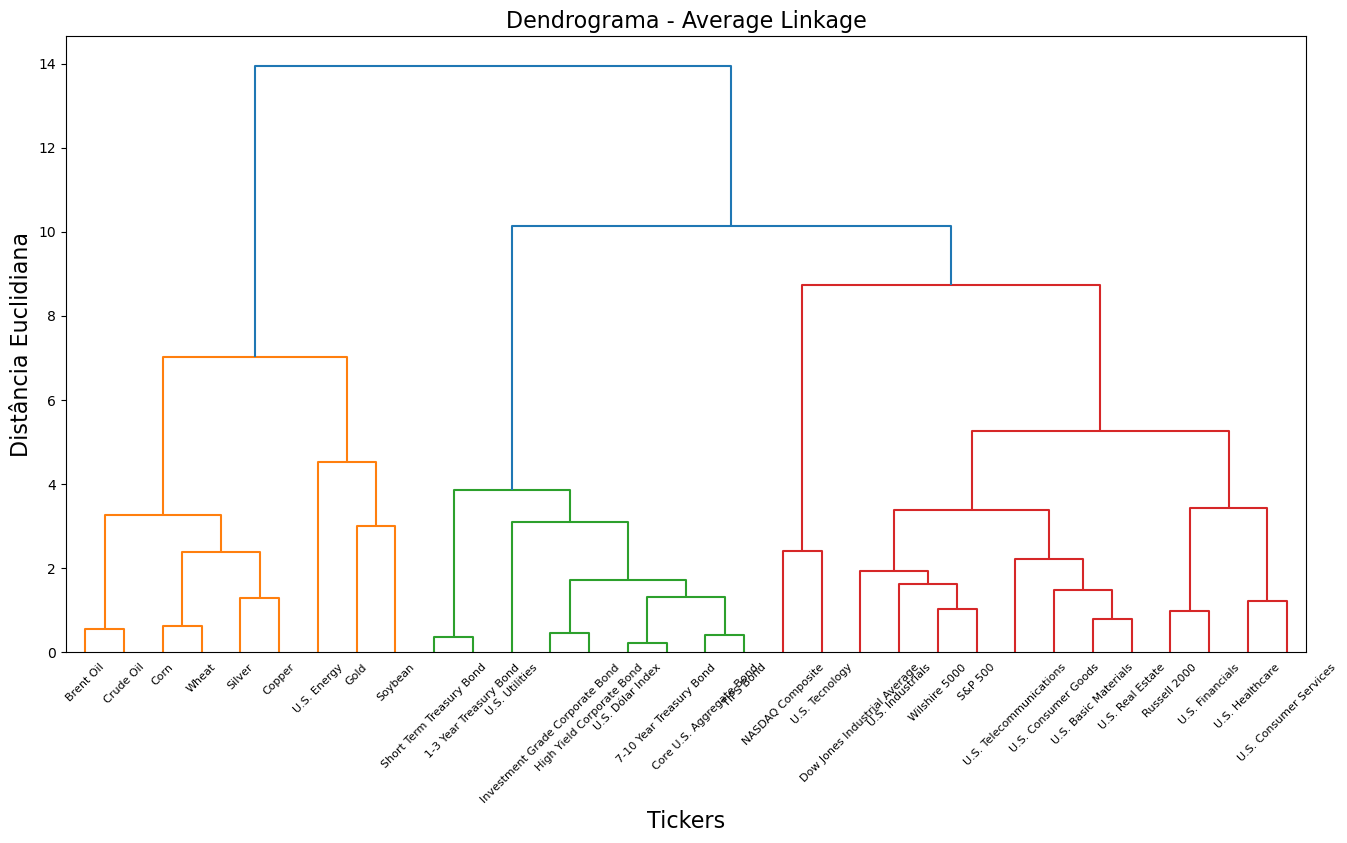

In [12]:
import scipy.cluster.hierarchy as sch

plt.figure(figsize=(16,8))

h_linkage = sch.linkage(ri_data[['Retornos','Volatilidade']], method = 'average', metric = 'euclidean')
dendrogram = sch.dendrogram(h_linkage, labels = list(tickers_nomes.values()))

plt.title('Dendrograma - Average Linkage', fontsize=16)
plt.xlabel('Tickers', fontsize=16)
plt.ylabel('Distância Euclidiana', fontsize=16)

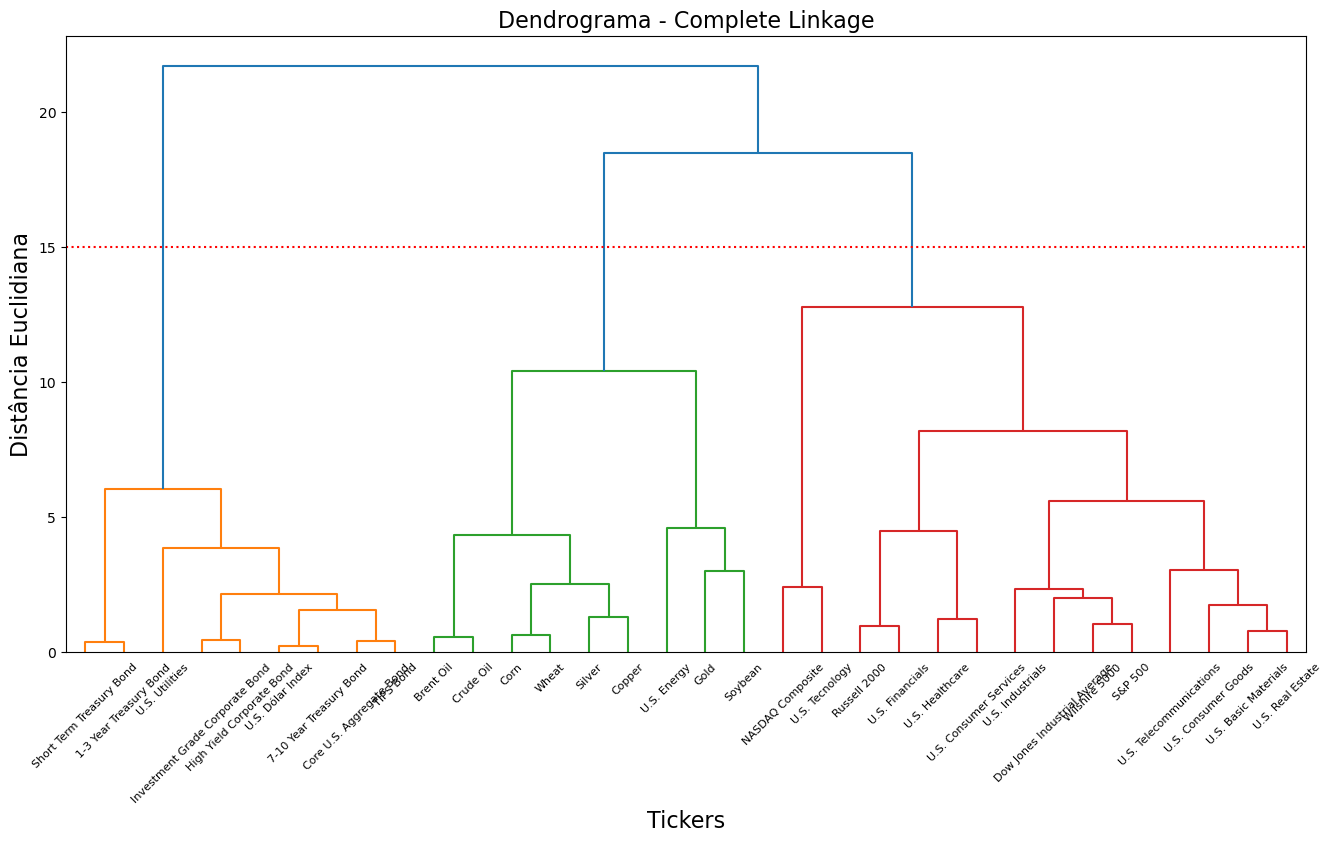

In [13]:
import scipy.cluster.hierarchy as sch

plt.figure(figsize=(16,8))

h_linkage = sch.linkage(ri_data[['Retornos','Volatilidade']], method = 'complete', metric = 'euclidean')
dendrogram = sch.dendrogram(h_linkage, labels = list(tickers_nomes.values()))

plt.title('Dendrograma - Complete Linkage', fontsize=16)
plt.xlabel('Tickers', fontsize=16)
plt.ylabel('Distância Euclidiana', fontsize=16)
plt.axhline(y = 15, linestyle = 'dotted', color = 'red');

Text(0, 0.5, 'Distância Euclidiana')

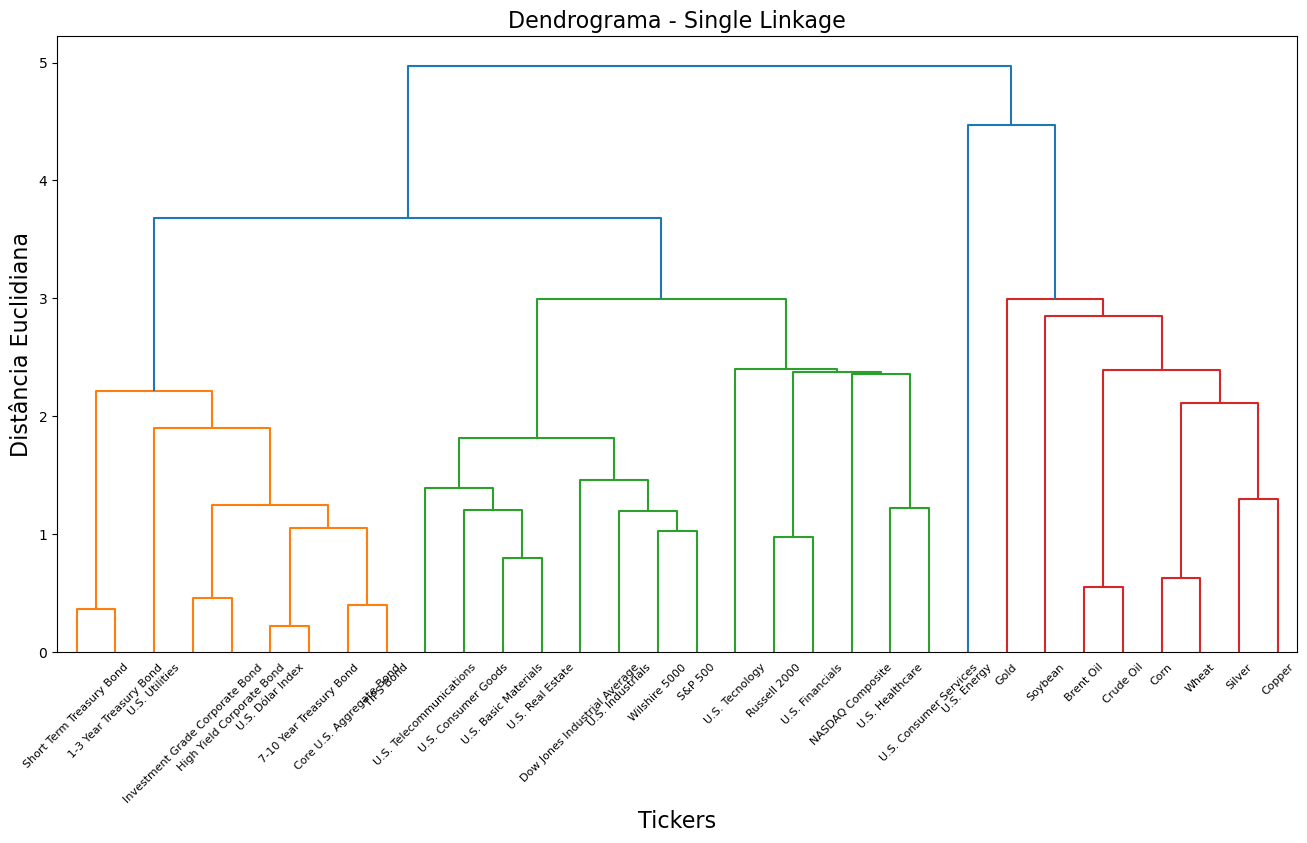

In [14]:
import scipy.cluster.hierarchy as sch

plt.figure(figsize=(16,8))

h_linkage = sch.linkage(ri_data[['Retornos','Volatilidade']], method = 'single', metric = 'euclidean')
dendrogram = sch.dendrogram(h_linkage, labels = list(tickers_nomes.values()))

plt.title('Dendrograma - Single Linkage', fontsize=16)
plt.xlabel('Tickers', fontsize=16)
plt.ylabel('Distância Euclidiana', fontsize=16)

## Não-Hierárquico: K-Means

Uma técnica muito comum é o k-means onde o número de cluster é definido a priori, segundo Morettin o algoritmo tem o objetivo de "agregar os pontos em K grupos, de tal modo que a soma dos quadrados das distâncias dos pontos aos centros dos agrupamentos (clusters) seja minimizada" onde o objetivo "consiste na definição de grupos em que a variação interna é minimizada". Como explicado por Fávero, o procedimento k-means é um processo que busca alocar os elementos (observações) em clusters onde as distâncias de seus centroides seja minimizada e é mais indicado quando trabalha-se com base de dados maiores em relação ao hierárquico. A escolha do número de cluster é definido pelo analista podendo adotar algum dos métodos abaixo: 

### Método de Elbow

Leva em consideração da diferença da distância de cada elemento (observação) em relação ao seu centroide elevando o resultado ao quadrado pois serão somados posteriormente, o resultado deste cálculo é o within-cluster sum of squares (WCSS). A lógica é que a medida que vou adicionando clusters a distância de cada elemento (observação) a um centroide necessariamente irá diminuir (no limite posso ter um cluster para cada observação, porém não faria sentido). O número ótimo de clusters é dado no ponto onde a redução do WCSS passa-se a ser bem pequena, ou seja, não seria eficiente adicionar mais clusters, geralmente demarcado no gráfico onde há uma "quina" ou um "cotovelo" que é de onde vem o nome "elbow".

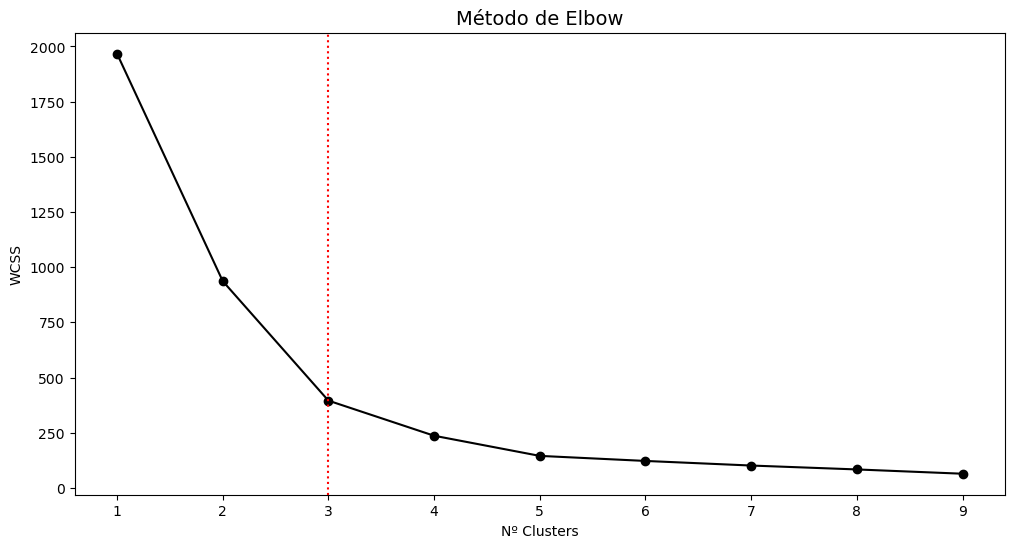

In [15]:
elbow = []

K = range(1,10) 

for k in K:
    KmeanElbow = sk.cluster.KMeans(n_clusters=k, init='random', n_init='auto', random_state=1000).fit(ri_data[['Retornos','Volatilidade']])
    elbow.append(KmeanElbow.inertia_)
    
plt.figure(figsize=(12,6))
plt.plot(K, elbow, marker='o', color = 'black')
plt.xlabel('Nº Clusters')
plt.ylabel('WCSS')
plt.title('Método de Elbow', fontsize = 14)
plt.axvline(x = 3, linestyle = 'dotted', color = 'red') 

### Método da Silhueta

Leva em consideração a distância de cada elemento em relação ao seu cluster e ao cluster mais próximo, a ideia é que quanto mais um elemento estiver próximo do centroide do seu próprio cluster e longe do outro cluster, mais eficiente seria a clusterização. O resultado deste cálculo é um valor que varia entre -1 e +1 e escolhe-se o número de clusters que forneça o valor médio mais próximo de 1. 

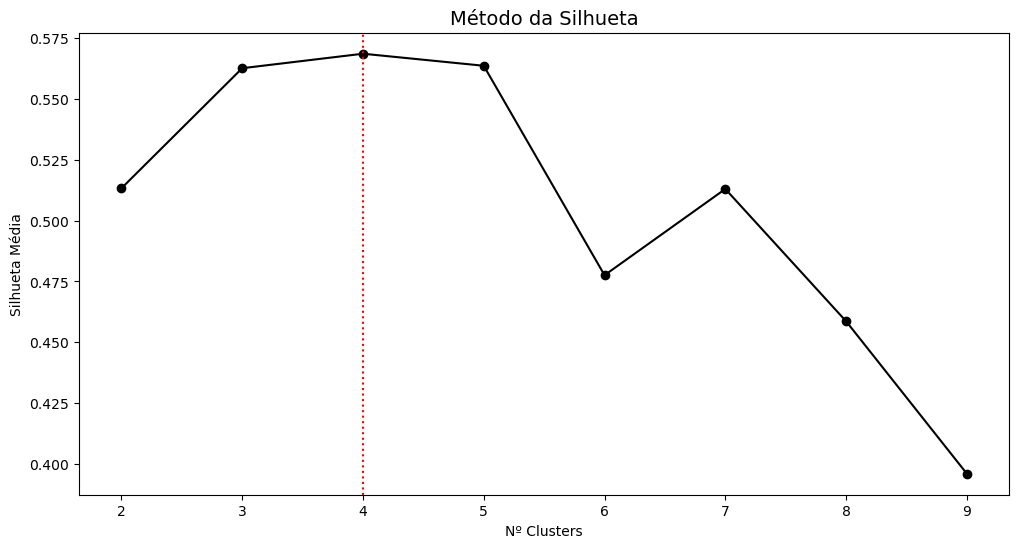

In [16]:
silhueta = []
I = range(2,10) 
for i in I: 
    KmeansSil = sk.cluster.KMeans(n_clusters=i, init='random', n_init='auto', random_state=100).fit(ri_data[['Retornos','Volatilidade']])
    silhueta.append(sk.metrics.silhouette_score(ri_data[['Retornos','Volatilidade']], KmeansSil.labels_))

plt.figure(figsize=(12,6))
plt.plot(range(2, 10), silhueta, color = 'black', marker='o')
plt.xlabel('Nº Clusters')
plt.ylabel('Silhueta Média')
plt.title('Método da Silhueta', fontsize = 14)
plt.axvline(x = silhueta.index(max(silhueta))+2, linestyle = 'dotted', color = 'red') 

### Criando os Clusters

In [17]:
kmeans_final = KMeans(n_clusters = 4, init = 'random', n_init='auto', random_state=100).fit(ri_data[['Retornos','Volatilidade']])

kmeans_clusters = kmeans_final.labels_
ri_data['cluster_kmeans'] = kmeans_clusters
ri_data['cluster_kmeans'] = ri_data['cluster_kmeans'].astype('category') # clusters não são variáveis métricas, mas sim, categóricas.

ri_data.sort_values(by='cluster_kmeans')

,Índice,Retornos,Volatilidade,cluster_kmeans
^IXIC,NASDAQ Composite,12.717965,15.902183,0
^NDX,U.S. Tecnology,14.548301,17.460243,0
^SP500-35,U.S. Healthcare,10.036714,13.777724,0
^SP500-25,U.S. Consumer Services,11.219785,14.074422,0
^FTW5000,Wilshire 5000,8.840768,9.353334,1
^SP500-60,U.S. Real Estate,5.201379,9.759151,1
^SP500-30,U.S. Consumer Goods,6.281971,8.394385,1
^SP500-20,U.S. Industrials,7.761500,9.867443,1
^SP500-50,U.S. Telecommunications,3.924373,10.322205,1
^SP500-15,U.S. Basic Materials,5.971504,9.556377,1


## Análise de Variância (ANOVA)

A análise de variância (one-way ANOVA) é utilizada para identificar se os clusters possuem variâncias significativamente diferentes, a lógica é que se os clusters realmente são distintos entre si, devem possuir variâncias estatisticamente diferentes. É estabelecido duas hipóteses:

- H0: As variâncias entre os clusters são iguais.
- H1: As variâncias entre os clusters são diferentes.

Rodamos para cada uma das nossas variáveis e obtemos os seguintes resultados:

In [18]:
print('Anova: Retornos')

print(pg.anova(dv='Retornos', 
         between='cluster_kmeans', 
         data=ri_data[['Retornos','Volatilidade','cluster_kmeans']],
         detailed=False))

print('\n\nAnova: Volatilidade')

print(pg.anova(dv='Volatilidade', 
         between='cluster_kmeans', 
         data=ri_data[['Retornos','Volatilidade', 'cluster_kmeans']],
         detailed=False))

Anova: Retornos
           Source  ddof1  ddof2          F         p-unc       np2
0  cluster_kmeans      3     28  71.504174  3.062341e-13  0.884542


Anova: Volatilidade
           Source  ddof1  ddof2          F         p-unc       np2
0  cluster_kmeans      3     28  66.864994  6.979029e-13  0.877513


Como pode-se ver pelos resultados acima, o p-valor das estatísticas F (71,47 e 66,96) calculadas para cada uma das nossas variáveis é menor que o nível de significância de 5% (0,05) o que nos permite rejeitar a hipótese nula (H0) de que a variância entre os grupos é igual e aceitar a hipótese alternativa (H1) de que é diferentes. Isto significa que tanto o retorno quanto a volatilidade foram variáveis úteis para formação dos clusters estatisticamente distintos. 

# Resultados Finais

## Método Não-Hierárquico: K-Means

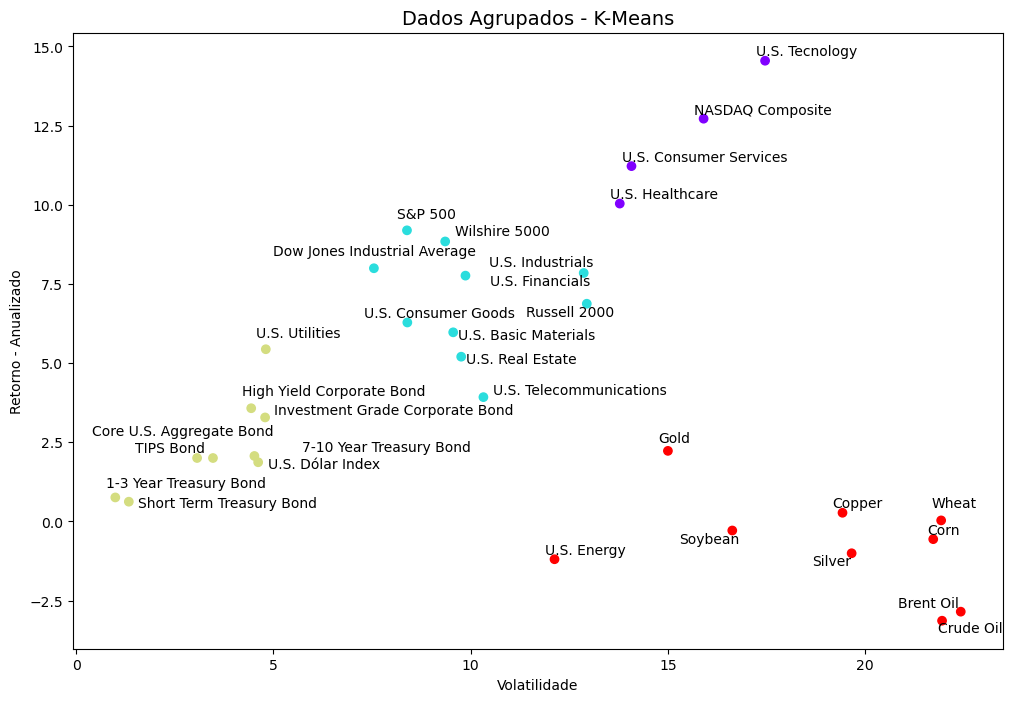

In [19]:
plt.figure(figsize=(12,8))

plt.scatter(ri_data.iloc[:,2], ri_data.iloc[:,1], c = kmeans_clusters, cmap ="rainbow")

texts = [] 
for i, txt in enumerate(ri_data['Índice']):
    texts.append(plt.text(ri_data.iloc[i, 2], ri_data.iloc[i, 1], txt, ha='center'))   
    
plt.xlabel('Volatilidade')
plt.ylabel('Retorno - Anualizado')
plt.title('Dados Agrupados - K-Means', fontsize=14)
adjust_text(texts)

#### Amarelo: 
- Foi reunido as treasures e corporate bonds, ou seja, a renda fixa em geral. Também foi incluído o índice setorial de utitilies que comumente são tratadas como ações defensivas e de geração de caixa mais previsível. 
#### Verde-água: 
- Foi reunido os principais índices de ações dos EUA e também grande parte dos índices setoriais. Neste cluster podemos ter uma visão geral da performance das equities nesta janelas que definimos. 
#### Roxo: 
- Foi reunido growth stocks dos setores de tecnologia, consumer services e healthcare que superaram o mercado de ações de forma expressiva nos últimos anos, foram também ações que apresentam uma maior volatilidade provavelmente devido a maior incerteza da sua performance futura. 
#### Vermelho: 
- Foi reunido as commodities e o índice setorial de energia dos EUA que reúne as companhias dos setores de óleo & gás, foram observações que apresentaram grande volatilidade e baixo retorno. Parte da explicação pode residir no fato que commodities em si não geram fluxo de caixa e também possuem caráter bastante cíclico. 

## Método Hierárquico: Complete Linkage

Forneceu um resultado parecido ao K-Means com a diferença que os índices de ações dos setores de Consumer Services e Healthcare ficou separado do cluster com os índices de tecnologia. 

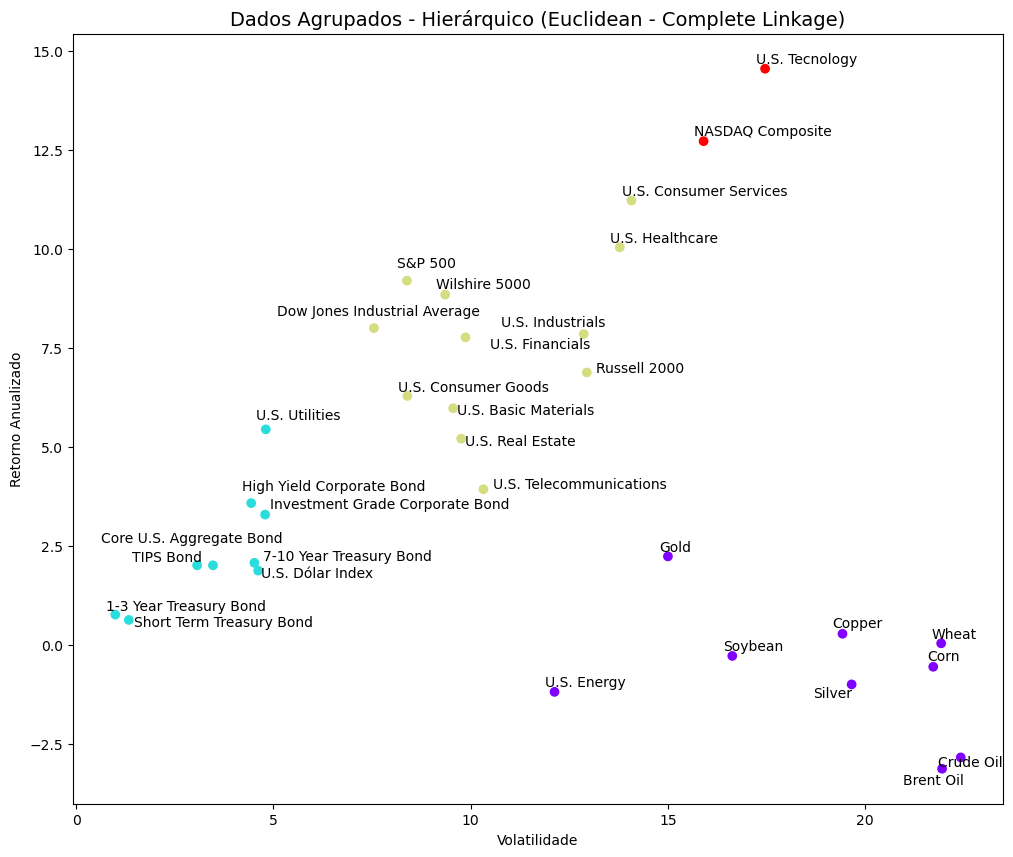

In [25]:
agg_complete = AgglomerativeClustering(n_clusters = 4, metric = 'euclidean', linkage = 'complete')
agg_cluster = agg_complete.fit_predict(ri_data[['Retornos', 'Volatilidade']])
ri_data['cluster_agg'] = agg_cluster
ri_data['cluster_agg'] = ri_data['cluster_agg'].astype('category')

plt.figure(figsize=(12,10))

plt.scatter(ri_data.iloc[:,2], ri_data.iloc[:,1], c = agg_cluster, cmap ="rainbow")

texts = [] 
for i, txt in enumerate(ri_data['Índice']):
    texts.append(plt.text(ri_data.iloc[i, 2], ri_data.iloc[i, 1], txt, ha='center'))   
    
plt.xlabel('Volatilidade')
plt.ylabel('Retorno Anualizado')
plt.title('Dados Agrupados - Hierárquico (Euclidean - Complete Linkage)', fontsize=14)
adjust_text(texts)

## Organização e Estatística Descritiva dos Clusters

In [21]:
print(ri_data[['Índice', 'cluster_kmeans', 'cluster_agg']].sort_values(by='cluster_kmeans'))

                                      Índice cluster_kmeans cluster_agg
^IXIC                       NASDAQ Composite              0           0
^NDX                          U.S. Tecnology              0           0
^SP500-35                    U.S. Healthcare              0           0
^SP500-25             U.S. Consumer Services              0           0
^FTW5000                       Wilshire 5000              1           0
^SP500-60                   U.S. Real Estate              1           0
^SP500-30                U.S. Consumer Goods              1           0
^SP500-20                   U.S. Industrials              1           0
^SP500-50            U.S. Telecommunications              1           0
^SP500-15               U.S. Basic Materials              1           0
^RUT                            Russell 2000              1           0
^DJI            Dow Jones Industrial Average              1           0
^GSPC                                S&P 500              1     

In [26]:
# Clusters formados pelo método K-Means

clusters_indices = ri_data.groupby(by=['cluster_kmeans'])

print(clusters_indices.describe().T)

cluster_kmeans              0          1         2          3
Retornos     count   4.000000  10.000000  9.000000   9.000000
             mean   12.130691   6.988713  2.401387  -0.722726
             std     1.949720   1.658641  1.498080   1.625472
             min    10.036714   3.924373  0.622288  -3.136577
             25%    10.924017   6.049121  1.868152  -1.194894
             50%    11.968875   7.317709  2.002518  -0.560758
             75%    13.175549   7.957269  3.283246   0.031554
             max    14.548301   9.192225  5.437195   2.227555
Volatilidade count   4.000000  10.000000  9.000000   9.000000
             mean   15.303643   9.899165  3.559315  18.981591
             std     1.717419   1.787404  1.485492   3.637050
             min    13.777724   7.547205  0.993721  12.124170
             25%    14.000248   8.634122  3.066492  16.628951
             50%    14.988303   9.657764  4.437676  19.653620
             75%    16.291698  10.208515  4.614236  21.922188
        

In [27]:
# Clusters formados pelo método hierárquico: complete linkage

clusters_indices = ri_data.groupby(by=['cluster_agg'])

print(clusters_indices.describe().T)

cluster_agg                 0         1          2          3
Retornos     count   9.000000  9.000000  12.000000   2.000000
             mean   -0.722726  2.401387   7.595302  13.633133
             std     1.625472  1.498080   2.078825   1.294243
             min    -3.136577  0.622288   3.924373  12.717965
             25%    -1.194894  1.868152   6.204354  13.175549
             50%    -0.560758  2.002518   7.803098  13.633133
             75%     0.031554  3.283246   8.928632  14.090717
             max     2.227555  5.437195  11.219785  14.548301
Volatilidade count   9.000000  9.000000  12.000000   2.000000
             mean   18.981591  3.559315  10.570317  16.681213
             std     3.637050  1.485492   2.252756   1.101715
             min    12.124170  0.993721   7.547205  15.902183
             25%    16.628951  3.066492   9.113596  16.291698
             50%    19.653620  4.437676   9.813297  16.681213
             75%    21.922188  4.614236  12.883568  17.070728
        